In [133]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [134]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv', index_col=0)
print(data.head())

       TV  Radio  Newspaper  Sales
1 230.100 37.800     69.200 22.100
2  44.500 39.300     45.100 10.400
3  17.200 45.900     69.300  9.300
4 151.500 41.300     58.500 18.500
5 180.800 10.800     58.400 12.900


In [135]:
#Check for missing values
data.isnull().mean()

TV          0.000
Radio       0.000
Newspaper   0.000
Sales       0.000
dtype: float64

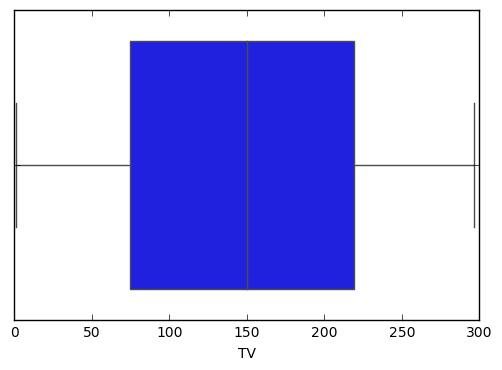

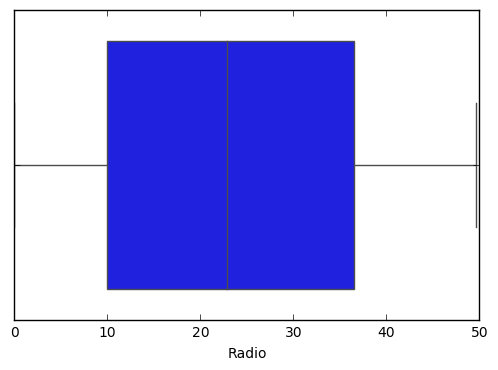

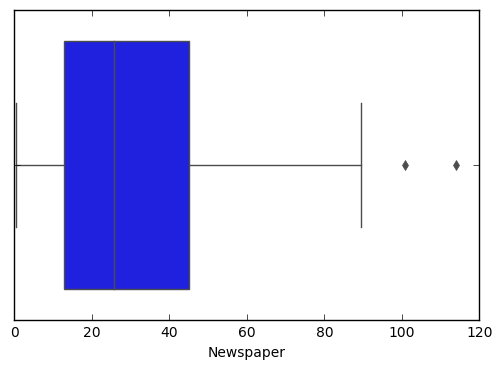

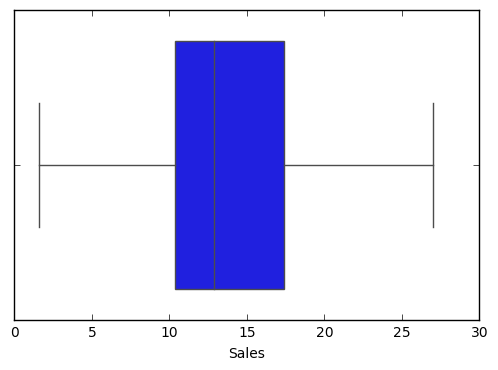

In [136]:
#Visualize boxplots of data 
for var in list(data.columns):
    sns.boxplot(data[var])
    plt.show()   

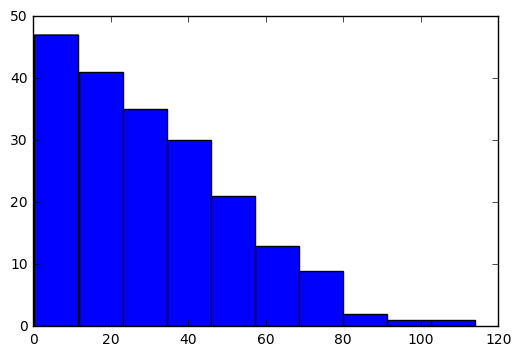

In [137]:
plt.hist(data['Newspaper'])
plt.show()

In [138]:
#Find outliers in Newspaper
iqr = data.Newspaper.quantile(0.75) - data.Newspaper.quantile(0.25)
lower_fence = data.Newspaper.median() - 2 * iqr
upper_fence = data.Newspaper.median() + 2 * iqr
print(iqr, lower_fence, upper_fence)

32.35 -38.95 90.45


In [139]:
extreme = data[data.Newspaper > upper_fence]
print(extreme)
#There are two outliers

         TV  Radio  Newspaper  Sales
17   67.800 36.600    114.000 12.500
102 296.400 36.300    100.900 23.800


In [140]:
#Replace outliers by top coding
data.loc[data.Newspaper > upper_fence, 'Newspaper'] = upper_fence

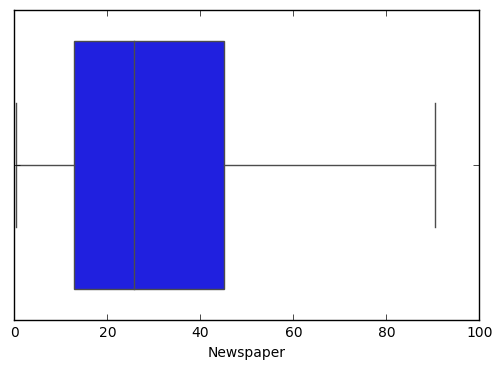

In [141]:
#Check to see if outliers removed by top coding
sns.boxplot(data.Newspaper)
plt.show()

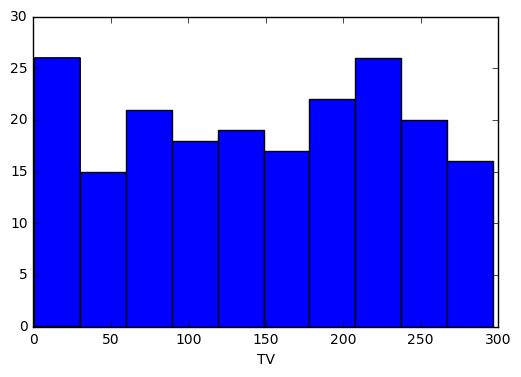

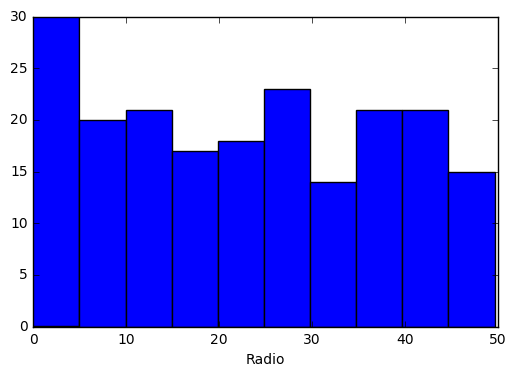

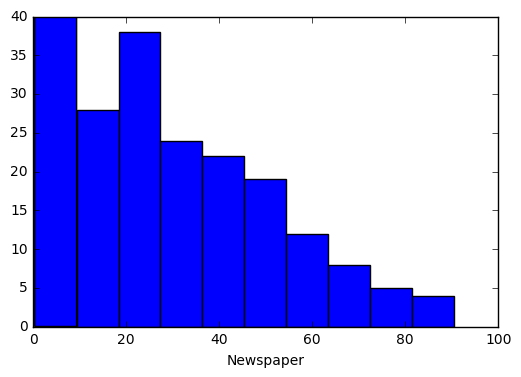

In [142]:
for var in data.columns[:-1]:
    plt.xlabel(var)
    plt.hist(data[var])
    plt.show()   

In [ ]:
plt.hist(np)

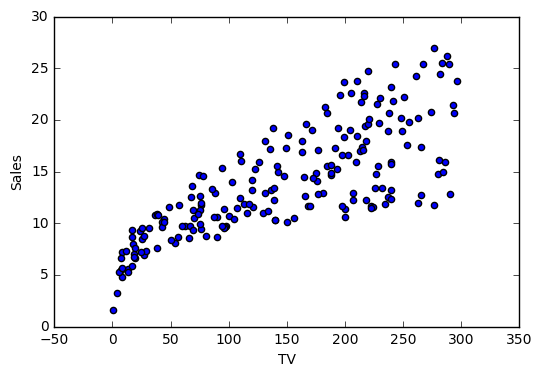

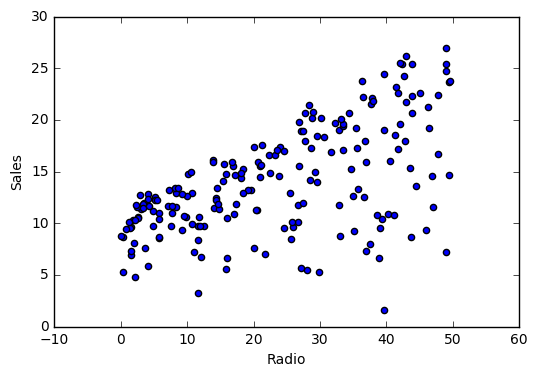

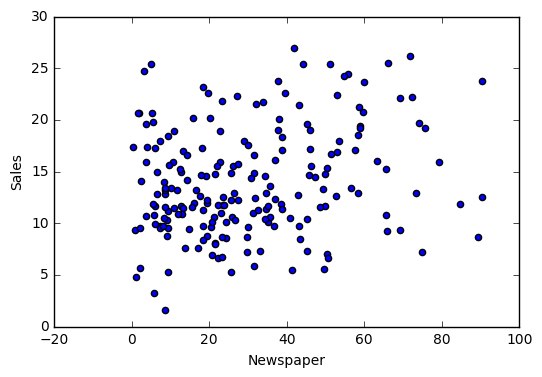

In [143]:
for var in data.columns[:-1]:
    plt.scatter(data[var], data.Sales)
    plt.xlabel(var)
    plt.ylabel('Sales')
    plt.show()

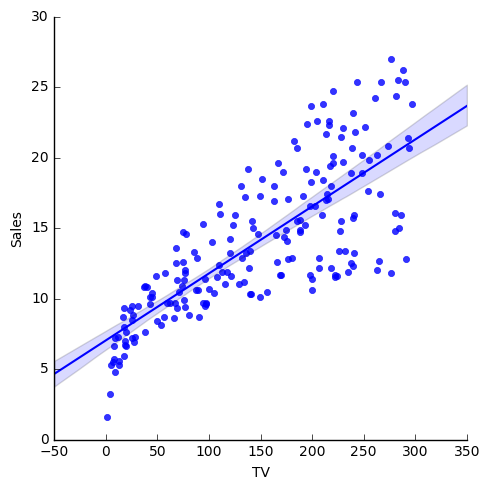

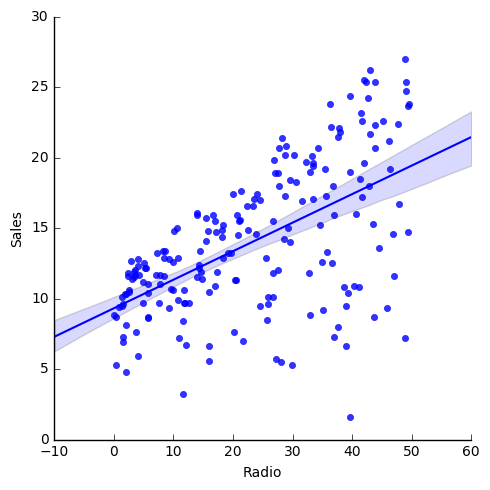

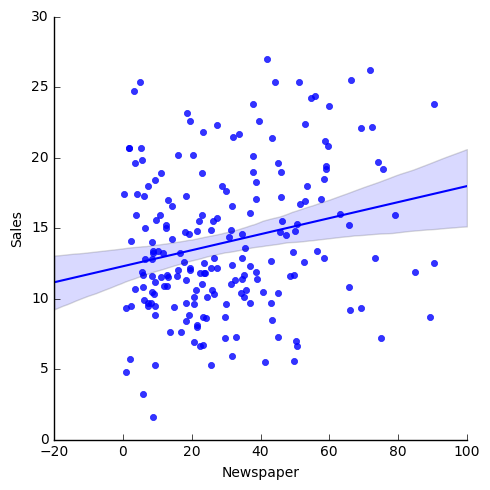

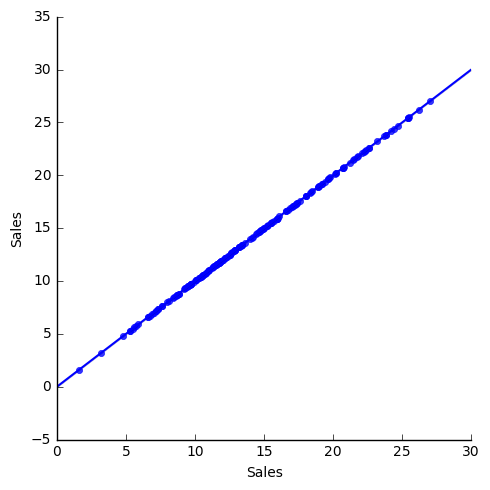

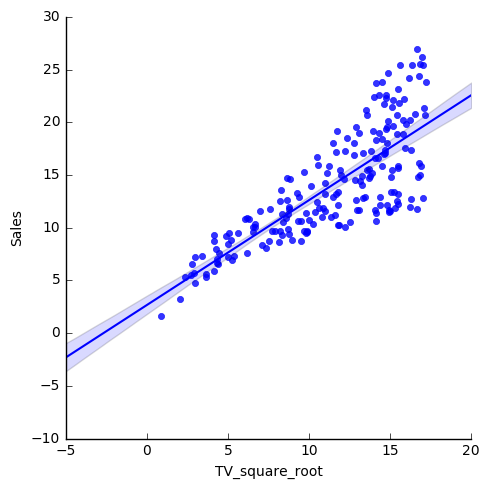

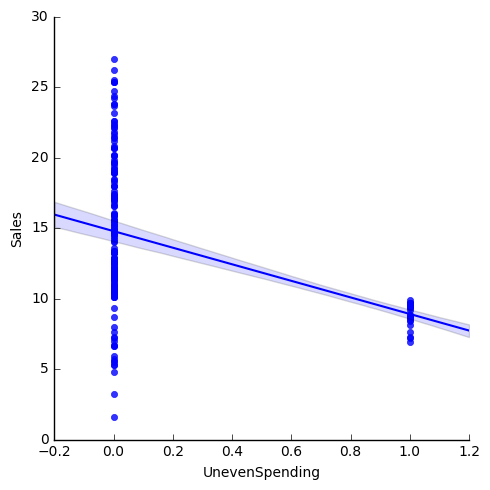

In [213]:
for var in data.columns[:-1]:
    sns.lmplot(data=data, x = var, y = 'Sales')
    plt.show()

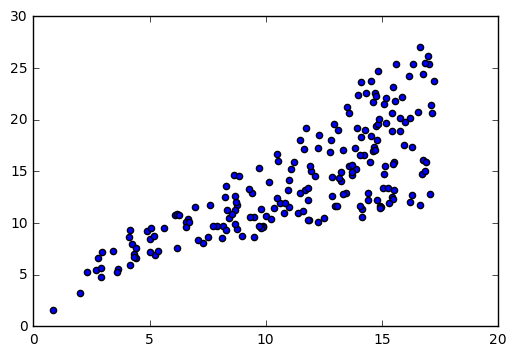

In [144]:
plt.scatter(np.sqrt(data.TV), data.Sales)
plt.show()

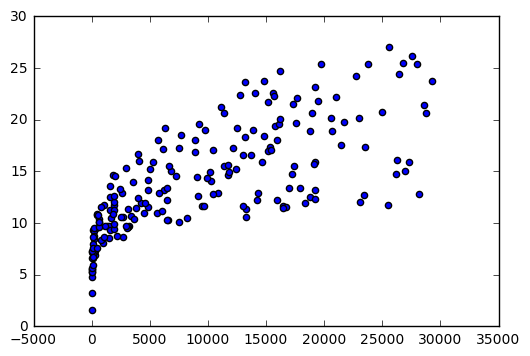

In [165]:
plt.scatter(data.TV ** 2/3, data.Sales)
plt.show()

In [145]:
data['TV_square_root'] = np.sqrt(data.TV)

In [192]:
temp = data[(data.TV > 20) & (data.Sales < 10)]
temp['Total_Spending'] = data.TV + data.Newspaper + data.Radio
data['Total_Spending'] = data.TV + data.Newspaper + data.Radio

/Users/spencerfogelman/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [193]:
def uneven_spending(data):
    if data[0] / data[5] > .65:
        return 1
    if data[1] / data[5] > .65:
        return 1
    if data[2] / data[5] > .65:
        return 1
    else: 
        return 0
    

In [194]:
temp['UnevenSpending'] = temp.apply(uneven_spending, axis=1)
data['UnevenSpending'] = data.apply(uneven_spending, axis=1)

/Users/spencerfogelman/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/spencerfogelman/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [195]:
data.head()

,TV,Radio,Newspaper,Sales,TV_square_root,UnevenSpending,Total_Spending
1,230.100,37.800,69.200,22.100,15.169,0,337.100
2,44.500,39.300,45.100,10.400,6.671,0,128.900
3,17.200,45.900,69.300,9.300,4.147,0,132.400
4,151.500,41.300,58.500,18.500,12.309,0,251.300
5,180.800,10.800,58.400,12.900,13.446,0,250.000


In [202]:
X = data.drop(['Sales', 'Newspaper', 'TV', 'Total_Spending'], axis=1)
y = data.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [203]:
data.UnevenSpending.value_counts()


0    174
1     26
Name: UnevenSpending, dtype: int64

In [204]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [205]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(40, 3)
(40,)
(160, 3)
(160,)


In [206]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.9395019639428773
0.9280880056734033


In [207]:
regr.coef_

array([3.05499052, 4.01941839, 0.48590731])

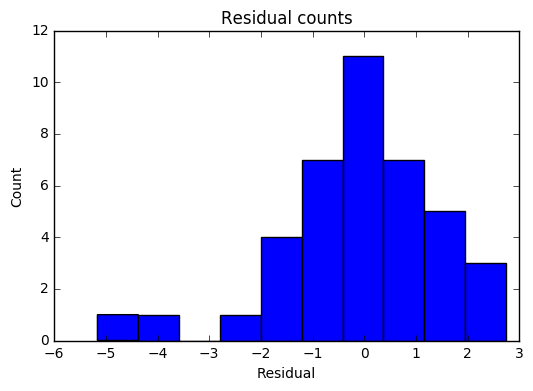

In [208]:
# Extract predicted values.
predicted = regr.predict(X_test).ravel()
actual = y_test

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

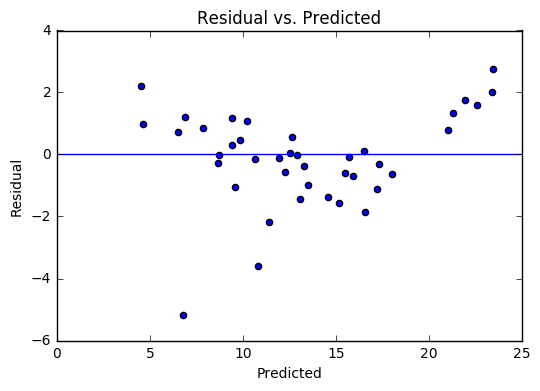

In [209]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


In [210]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Radio,TV_square_root,UnevenSpending
Radio,1.000,0.029,-0.307
TV_square_root,0.029,1.000,-0.379
UnevenSpending,-0.307,-0.379,1.000
